In [1]:
import keras.models
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation, GaussianNoise
import os
from skimage.util import random_noise

In [30]:
# Key:
# 0 - Down
# 1 - Up
# 2 - Wave

small_to_large_image_size_ratio = 0.05

X_train = []
X_test = []
Y_train = []
Y_test = []

source_directory = "dataset/thumbsdown/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(0)

source_directory = "dataset/thumbsup/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(1)

source_directory = "dataset/wave/KeyFrames/train"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_train.append(image)
    Y_train.append(2)

source_directory = "dataset/thumbsdown/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(0)

source_directory = "dataset/thumbsup/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)

    X_test.append(image)
    Y_test.append(1)

source_directory = "dataset/wave/KeyFrames/test"
for filename in os.listdir(source_directory):
    image = cv2.imread(source_directory + "/" + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.resize(image,  # original image
                           (0, 0),  # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio,
                           fy=small_to_large_image_size_ratio,
                           interpolation=cv2.INTER_NEAREST)
    # image = random_noise(image, mode='s&p', amount=0.011)
    X_test.append(image)
    Y_test.append(2)


print(np.shape(X_train))
print(np.shape(X_test))

(1855, 54, 96)
(219, 54, 96)


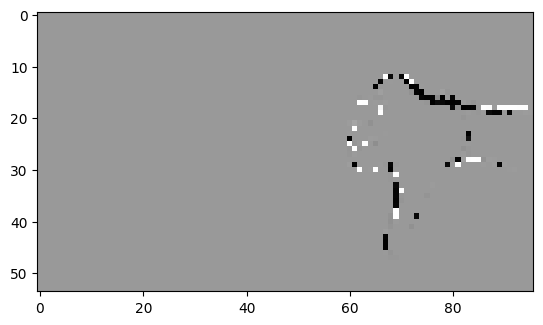

In [31]:
train_size = np.shape(X_train)
imheight = train_size[1]
imwidth = train_size[2]
train_size = train_size[0]
test_size = np.shape(X_test)[0]

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = X_train.reshape(train_size, imheight, imwidth, 1)
X_test = X_test.reshape(test_size, imheight, imwidth, 1)
Y_train = Y_train.reshape(train_size)
Y_test = Y_test.reshape(test_size)

plt.imshow(X_train[100].reshape(imheight, imwidth),cmap='Greys')

In [32]:
model = Sequential()

# add model layers
model.add(GaussianNoise(0.01, input_shape=(imheight, imwidth, 1)))
model.add(Conv2D(8, kernel_size=3, activation='relu', input_shape=(imheight, imwidth, 1)))
model.add(Conv2D(4, kernel_size=5, activation='relu'))
model.add(Conv2D(2, kernel_size=7, activation='relu'))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_5 (GaussianN  (None, 54, 96, 1)        0         
 oise)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 94, 8)         80        
                                                                 
 conv2d_16 (Conv2D)          (None, 48, 90, 4)         804       
                                                                 
 conv2d_17 (Conv2D)          (None, 42, 84, 2)         394       
                                                                 
 dropout_4 (Dropout)         (None, 42, 84, 2)         0         
                                                                 
 flatten_4 (Flatten)         (None, 7056)              0         
                                                      

In [33]:
n_epochs = 10
history = model.fit(x=X_train,y=Y_train, epochs=n_epochs)

Epoch 1/10
58/58 [==============================] - 5s 71ms/step - loss: 7.1530 - accuracy: 0.6038
Epoch 2/10
58/58 [==============================] - 4s 70ms/step - loss: 0.3997 - accuracy: 0.8437
Epoch 3/10
58/58 [==============================] - 4s 69ms/step - loss: 0.1354 - accuracy: 0.9542
Epoch 4/10
58/58 [==============================] - 4s 69ms/step - loss: 0.0515 - accuracy: 0.9860
Epoch 5/10
58/58 [==============================] - 4s 68ms/step - loss: 0.0196 - accuracy: 0.9962
Epoch 6/10
58/58 [==============================] - 4s 68ms/step - loss: 0.0095 - accuracy: 0.9989
Epoch 7/10
58/58 [==============================] - 4s 70ms/step - loss: 0.0071 - accuracy: 0.9989
Epoch 8/10
58/58 [==============================] - 4s 69ms/step - loss: 0.0048 - accuracy: 0.9995
Epoch 9/10
58/58 [==============================] - 4s 69ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 10/10
58/58 [==============================] - 4s 69ms/step - loss: 0.0076 - accuracy: 0.9995


In [34]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 16ms/step - loss: 0.2173 - accuracy: 0.9498
Test accuracy: 0.9497717022895813


In [35]:
model.save("CNN_model")

INFO:tensorflow:Assets written to: CNN_model\assets


INFO:tensorflow:Assets written to: CNN_model\assets


In [36]:
saved_model = keras.models.load_model("CNN_model")
score = saved_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 13ms/step - loss: 0.2173 - accuracy: 0.9498
Test accuracy: 0.9497717022895813
